In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sktime.datasets import load_basic_motions

from sklearn.metrics import accuracy_score

X_train, y_train = load_basic_motions(split='train', return_type='numpy3D')
X_test, y_test = load_basic_motions(split='test', return_type='numpy3D')

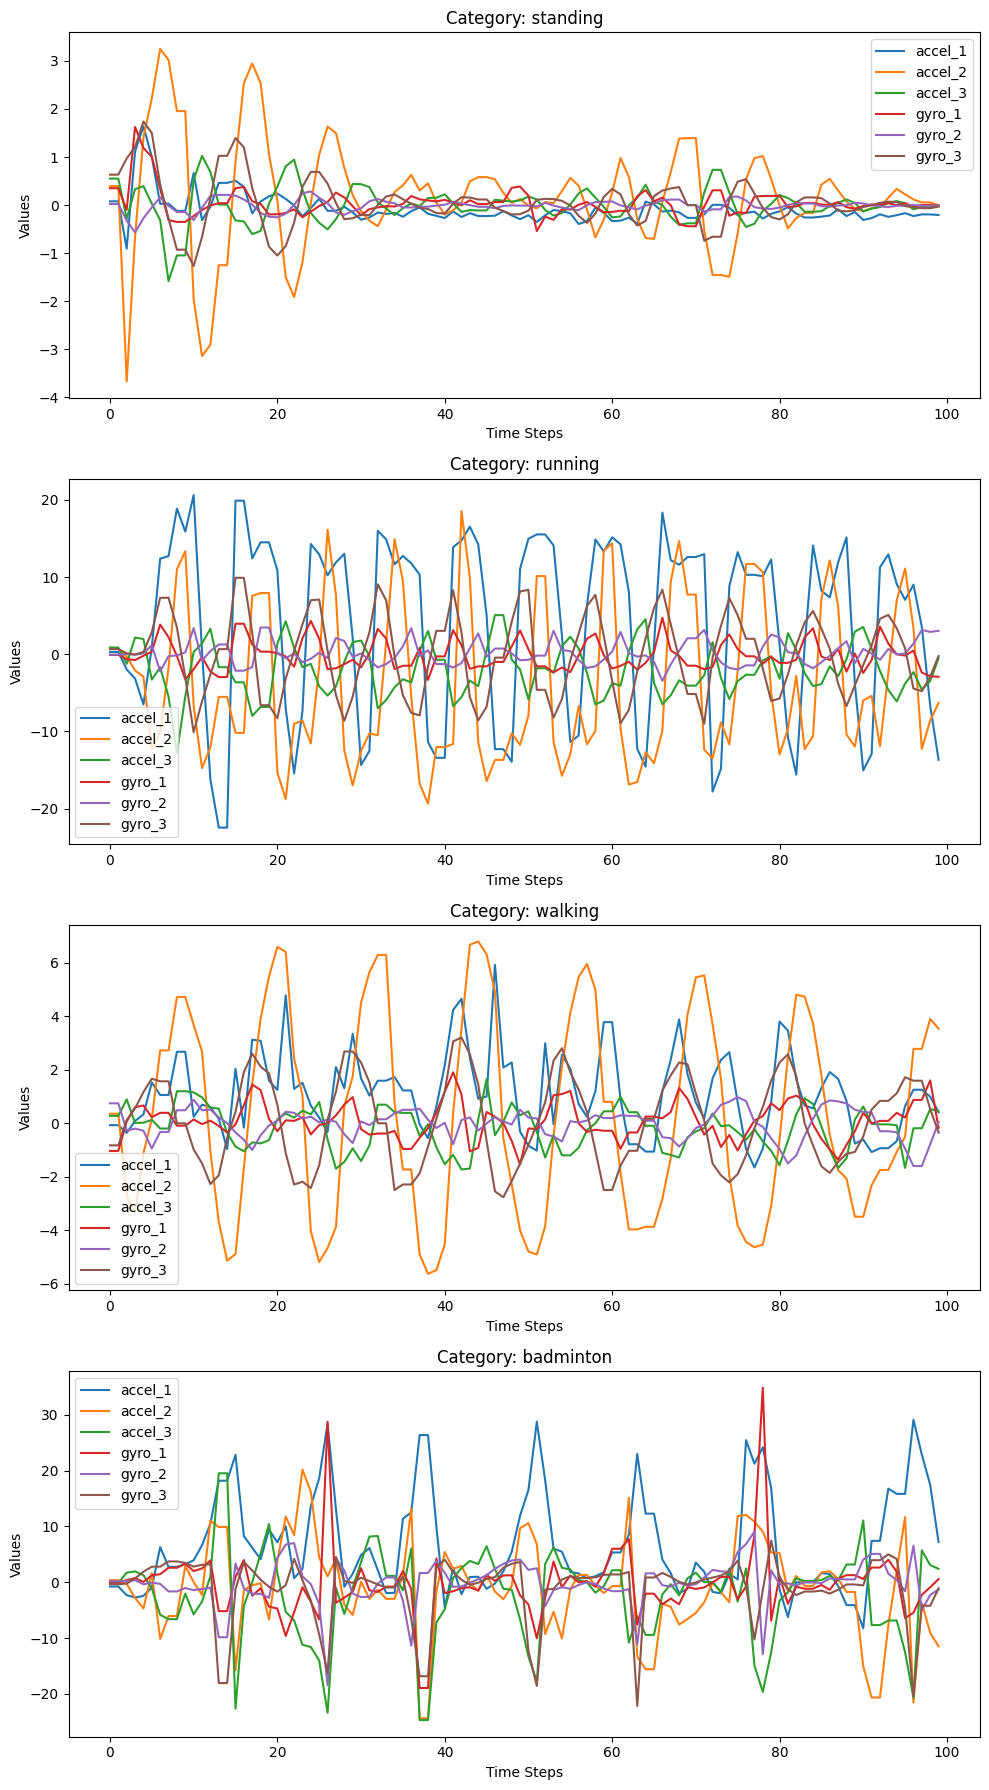

In [2]:
series_indices = [0, 10, 20, 30]
categories = ['standing', 'running', 'walking', 'badminton']
features = ["accel_1", "accel_2", "accel_3", "gyro_1", "gyro_2", "gyro_3"]

selected_series = X_train[series_indices]

fig, axes = plt.subplots(4, 1, figsize=(10, 18))

for i in range(4):  
    for j in range(selected_series.shape[1]):
        axes[i].plot(selected_series[i, j], label=features[j])

    axes[i].set_title(f"Category: {categories[i]}")
    axes[i].set_xlabel("Time Steps")
    axes[i].set_ylabel("Values")
    axes[i].legend()

plt.tight_layout()
plt.show()

## Catch22

In [4]:
from sktime.classification.feature_based import Catch22Classifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

accuracies = []

knn_clf = KNeighborsClassifier(n_neighbors=1)
ada_clf = AdaBoostClassifier(n_estimators=10, random_state=42)
rf_clf = RandomForestClassifier(n_estimators=10, random_state=42)
svc_clf = SVC()

classifiers = [knn_clf, ada_clf, rf_clf, svc_clf]

for classifier in classifiers:
    clf = Catch22Classifier(
        estimator=classifier,
        outlier_norm=True
    )
    
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    
    accuracies.append(round(accuracy_score(y_test, y_pred)*100,2))

print(accuracies)

[97.5, 100.0, 100.0, 72.5]


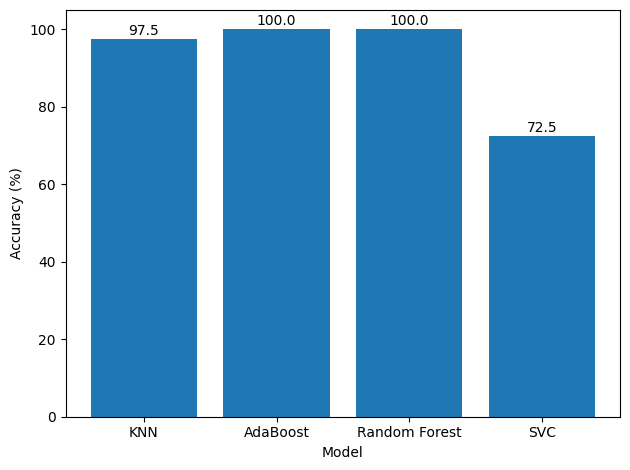

In [5]:
x = ['KNN', 'AdaBoost', 'Random Forest', 'SVC']

fig, ax = plt.subplots()
ax.bar(x, accuracies)
ax.set_xlabel('Model')
ax.set_ylabel('Accuracy (%)')

for i, v in enumerate(accuracies):
    ax.text(x=i, y=v+1, s=str(v), ha='center')

plt.tight_layout()